In [1]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline 

In [2]:
df=pd.read_excel('klaster_analysis.xlsx')

In [3]:
col=['average_rating', 'amount_of_feature']

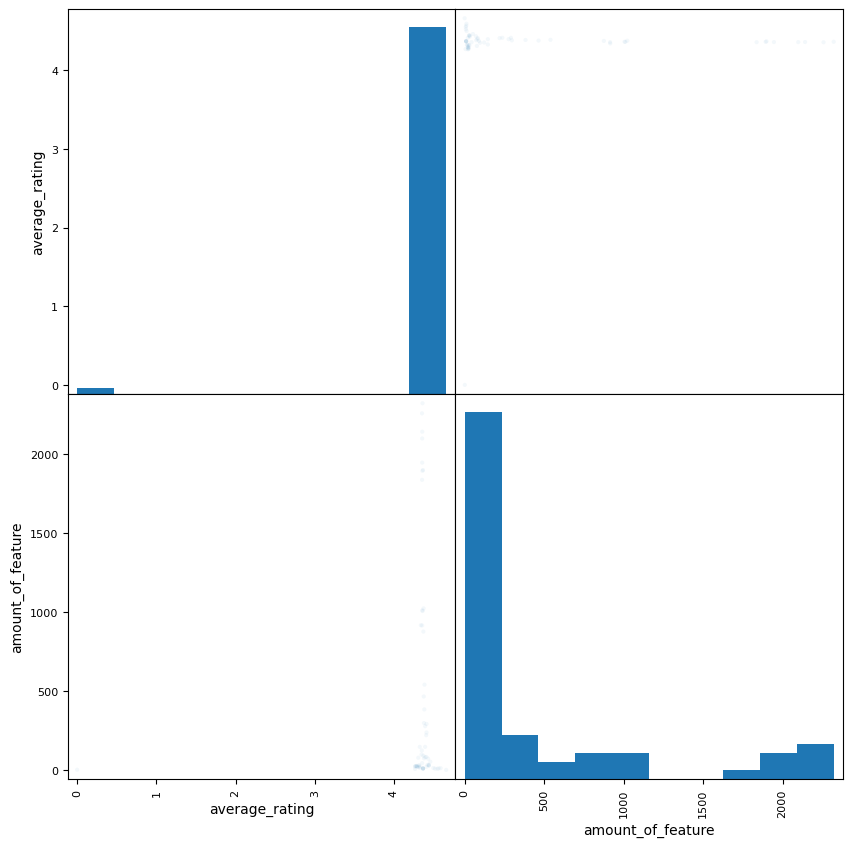

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], alpha=0.05, figsize=(10, 10));

In [5]:
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [6]:
data_dist = pdist(dataNorm, 'euclidean')
data_linkage = linkage(data_dist, method='average')

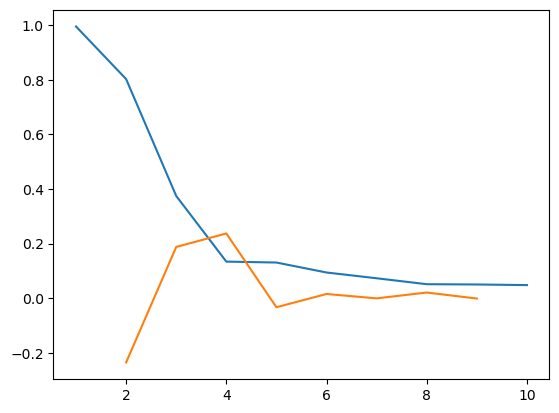

Рекомендованное количество кластеров: 4


In [7]:
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [8]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [31]:
nClust=4

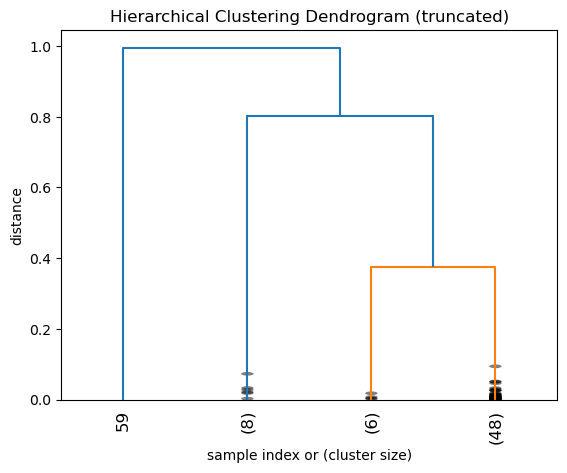

In [32]:
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [33]:
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3],
      dtype=int32)

In [34]:
col

['average_rating', 'amount_of_feature']

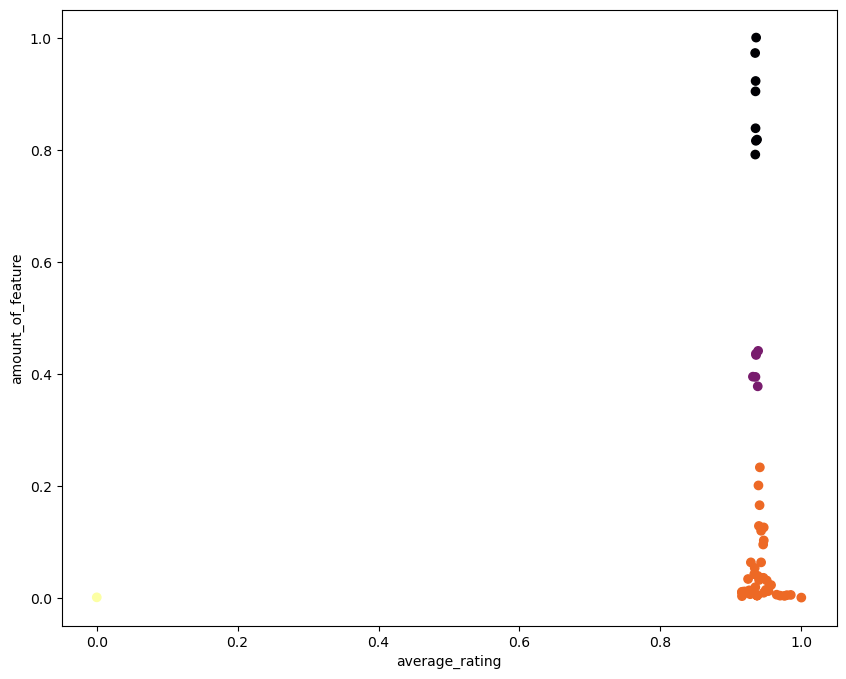

In [35]:
x=0
y=1
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='inferno')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [36]:
df['KMeans']=clusters
res=df.groupby('KMeans')[col].mean()
res['amount_of_features_in_klaster']=df.groupby('KMeans').size().values
res

,average_rating,amount_of_feature,amount_of_features_in_klaster
KMeans,,,
1,4.358876,2049.625000,8
2,4.360673,957.833333,6
3,4.387619,89.062500,48
4,0.000000,1.000000,1


In [37]:
df[df['KMeans']==1]

,number_of_feature,average_rating,amount_of_feature,KMeans
0,1,4.354821,2258,1
1,2,4.359597,1894,1
2,3,4.367357,1899,1
3,4,4.355655,1837,1
4,5,4.357912,2142,1
5,6,4.357373,1946,1
6,7,4.361262,2322,1
7,8,4.357033,2099,1


In [88]:
df[df['KMeans']==2]

,number_of_feature,average_rating,amount_of_feature,KMeans
8,9,4.374491,1023,2
9,10,4.356770,915,2
10,11,4.360961,1006,2
11,12,4.340062,916,2
12,13,4.371965,876,2
17,18,4.359788,1011,2


In [89]:
df[df['KMeans']==3]

,number_of_feature,average_rating,amount_of_feature,KMeans
13,14,4.376640,465,3
14,15,4.384061,383,3
15,16,4.385872,540,3
16,17,4.394268,277,3
18,19,4.411545,291,3
19,20,4.379644,297,3
20,21,4.326439,146,3
21,22,4.407855,220,3
22,23,4.411804,237,3
23,24,4.394154,146,3


In [91]:
df[df['KMeans']==4]

,number_of_feature,average_rating,amount_of_feature,KMeans
59,60,0.0,1,4
